In [11]:
# data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [12]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [13]:
from __future__ import division

In [14]:
# to import data from the web
import requests

# to work with csv file using String IO
from StringIO import StringIO

In [15]:
# url for poll data in csv format
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

# requeting info in text format
source = requests.get(url).text

# use StringIO to avoid IO error with pandas
poll_data = StringIO(source)

In [16]:
# converting poll_data to pandas dataframe

poll_df = pd.read_csv(poll_data)

poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 15 columns):
Pollster                  535 non-null object
Start Date                535 non-null object
End Date                  535 non-null object
Entry Date/Time (ET)      535 non-null object
Number of Observations    404 non-null float64
Population                535 non-null object
Mode                      535 non-null object
Clinton                   535 non-null int64
Trump                     535 non-null int64
Undecided                 520 non-null float64
Other                     266 non-null float64
Pollster URL              535 non-null object
Source URL                535 non-null object
Partisan                  535 non-null object
Affiliation               535 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 62.8+ KB


In [17]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Clinton,Trump,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation
0,Morning Consult,2016-06-30,2016-07-04,2016-07-05T19:55:24Z,2001.0,Registered Voters,Internet,41,40,19.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/07/05/clinton-...,Nonpartisan,None
1,YouGov/Economist,2016-07-02,2016-07-04,2016-07-06T14:29:45Z,1004.0,Registered Voters,Internet,42,37,11.0,11.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/07/06/clint...,Nonpartisan,None
2,YouGov/Economist,2016-07-02,2016-07-04,2016-07-06T14:29:45Z,392.0,Registered Voters - Democrat,Internet,77,11,7.0,5.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/07/06/clint...,Nonpartisan,None
3,Morning Consult,2016-06-30,2016-07-04,2016-07-05T19:55:24Z,750.0,Registered Voters - Democrat,Internet,75,13,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/07/05/clinton-...,Nonpartisan,None
4,YouGov/Economist,2016-07-02,2016-07-04,2016-07-06T14:29:45Z,283.0,Registered Voters - Republican,Internet,6,77,11.0,6.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/07/06/clint...,Nonpartisan,None


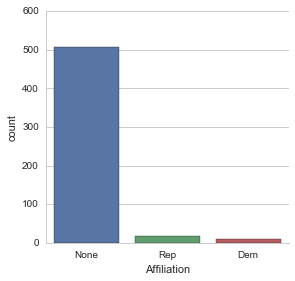

In [20]:
sns.factorplot('Affiliation',data=poll_df,kind='count')

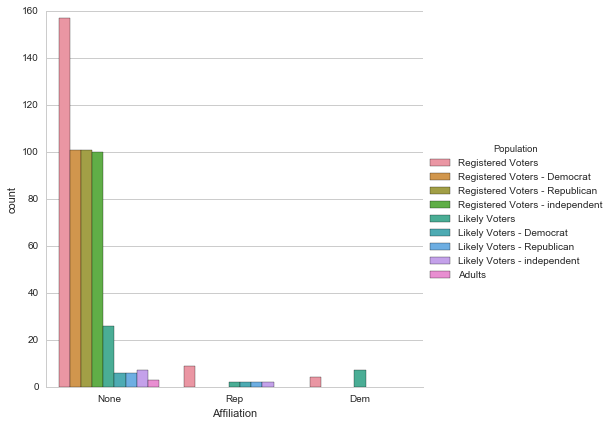

In [24]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count',size=6)

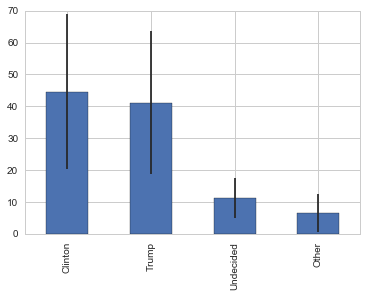

In [26]:
# poll averages for Clinton, Trump, Undecided and Other

# get the average
avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations',axis=0,inplace=True)

# get the stand dev/error
std = pd.DataFrame(poll_df.std())

std.drop('Number of Observations',axis=0,inplace=True)

# new plot using pandas built-in plot
avg.plot(yerr=std,kind='bar',legend=False)

In [28]:
#concatenate our average and std data

poll_avg = pd.concat([avg,std],axis=1)

#rename columns

poll_avg.columns = ['Average','STD']

poll_avg

,Average,STD
Clinton,44.652336,24.310928
Trump,41.158879,22.440662
Undecided,11.226923,6.223707
Other,6.503759,5.957870


In [39]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Clinton,Trump,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation
0,Morning Consult,2016-06-30,2016-07-04,2016-07-05T19:55:24Z,2001.0,Registered Voters,Internet,41,40,19.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/07/05/clinton-...,Nonpartisan,None
1,YouGov/Economist,2016-07-02,2016-07-04,2016-07-06T14:29:45Z,1004.0,Registered Voters,Internet,42,37,11.0,11.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/07/06/clint...,Nonpartisan,None
2,YouGov/Economist,2016-07-02,2016-07-04,2016-07-06T14:29:45Z,392.0,Registered Voters - Democrat,Internet,77,11,7.0,5.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/07/06/clint...,Nonpartisan,None
3,Morning Consult,2016-06-30,2016-07-04,2016-07-05T19:55:24Z,750.0,Registered Voters - Democrat,Internet,75,13,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/07/05/clinton-...,Nonpartisan,None
4,YouGov/Economist,2016-07-02,2016-07-04,2016-07-06T14:29:45Z,283.0,Registered Voters - Republican,Internet,6,77,11.0,6.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/07/06/clint...,Nonpartisan,None


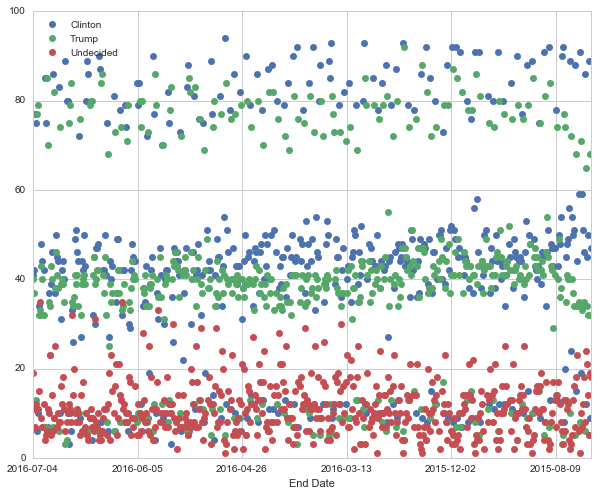

In [66]:
# poll sentiment vs time

poll_df.plot(x='End Date',y=['Clinton','Trump','Undecided'],marker='o',linestyle='',figsize=(10,8))

In [59]:
poll_df['Difference'] = (poll_df.Clinton - poll_df.Trump)/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Clinton,Trump,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Morning Consult,2016-06-30,2016-07-04,2016-07-05T19:55:24Z,2001.0,Registered Voters,Internet,41,40,19.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/07/05/clinton-...,Nonpartisan,None,0.01
1,YouGov/Economist,2016-07-02,2016-07-04,2016-07-06T14:29:45Z,1004.0,Registered Voters,Internet,42,37,11.0,11.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/07/06/clint...,Nonpartisan,None,0.05
2,YouGov/Economist,2016-07-02,2016-07-04,2016-07-06T14:29:45Z,392.0,Registered Voters - Democrat,Internet,77,11,7.0,5.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/07/06/clint...,Nonpartisan,None,0.66
3,Morning Consult,2016-06-30,2016-07-04,2016-07-05T19:55:24Z,750.0,Registered Voters - Democrat,Internet,75,13,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/07/05/clinton-...,Nonpartisan,None,0.62
4,YouGov/Economist,2016-07-02,2016-07-04,2016-07-06T14:29:45Z,283.0,Registered Voters - Republican,Internet,6,77,11.0,6.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/07/06/clint...,Nonpartisan,None,-0.71


In [69]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

In [71]:
poll_df.head()

,Start Date,Number of Observations,Clinton,Trump,Undecided,Other,Difference
0,2015-05-19,1046.00,48.75,34.25,14.00,2.5,0.1450
1,2015-06-20,420.75,47.25,35.00,17.75,NaN,0.1225
2,2015-06-21,1005.00,51.00,34.00,12.00,3.0,0.1700
3,2015-06-26,890.00,57.00,36.75,6.00,0.0,0.2025
4,2015-07-09,499.25,49.50,35.25,16.00,NaN,0.1425


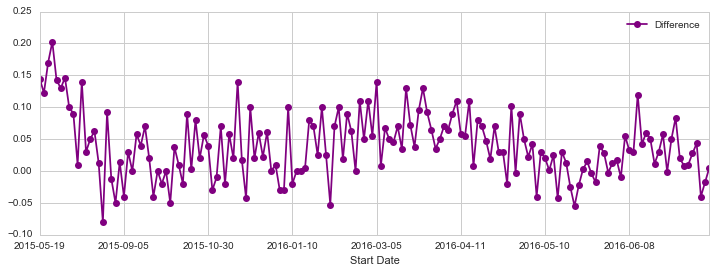

In [73]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')